In [1]:
%env QHL_NUMPY=jax

import time
from model import *
from data_loader import *
from layers_init import *
from jax.example_libraries.optimizers import adam, adamax

layer_sizes = [64, 512, 512, 512, 10]

params = init_network_params(layer_sizes, random.PRNGKey(0))
step_size = 0.1
num_epochs = 8
num_it = 1
batch_size = 128
n_targets = 10
kernel_size = 8
kernel_numb = 1
num_quantum = 1
num_conv = 1
kernel = np.random.randn(kernel_numb, kernel_size, kernel_size)
kernel2 = np.random.randn(kernel_numb, int(kernel_size/2), int(kernel_size/2))

#my_conv = [my_conv_1, my_conv_2]
theta = jnp.asarray(90*np.random.random((num_quantum, 6)))
print(type(theta))
theta14 = jnp.asarray(90*np.random.random(24), dtype = int)
params.insert(0, theta)
params.insert(0, kernel2)
params.insert(0, kernel)
print(len(theta))

loss_history = []
loss_history_train = []
loss_history_test = []
train_accuracy = []
test_accuracy = []
step_size = 0
opt_init, opt_state, get_params = adam(1e-3, b1 = 0.9, b2 = 0.999)
opt_state = opt_init(params)

training_generator, train_images, train_labels, test_images, test_labels = data(batch_size, n_targets)
# print(f'{theta=}')
# print(params[2])
for epoch in range(num_epochs):
    start_time = time.time()
    for x, y in training_generator:
        for it in range(num_it):
            yy = one_hot(y, n_targets)
#             my_conv_1 = Conv(kernel_numb,kernel_size, params[0])
#             my_conv_2 = Conv(kernel_numb,kernel_size/2, kernel = params[1])
#             my_conv = [my_conv_1, my_conv_2]
            loss_res, opt_state = update(opt_state, x, yy, step_size, optimizer = adam(1e-3, b1 = 0.9, b2 = 0.999), theta = None, conv=None)
            loss_history.append(float(loss_res))
            step_size += batch_size

    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    #loss_train = loss(params, train_images, train_labels, theta = None, conv=my_conv)
    loss_test = loss(params, test_images, test_labels, theta = None, conv=None)
    #loss_history_train.append(float(loss_train))
    loss_history_test.append(float(loss_test))
    train_acc = accuracy(params, train_images, train_labels, theta = None, conv=None)
    test_acc = accuracy(params, test_images, test_labels, theta = None, conv=None)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}")
    print("Test set accuracy {}".format(test_acc))
#     print(f'{theta=}')
#     print(params[2])
# print(f'{theta=}')

env: QHL_NUMPY=jax
Using JAX.


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


<class 'jaxlib.xla_extension.Array'>
1


/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning:

Epoch 0 in 37.72 sec
Training set accuracy 0.8305000066757202 loss 0.030637459829449654
Test set accuracy 0.8344999551773071
Epoch 1 in 36.52 sec
Training set accuracy 0.8090167045593262 loss 0.026774508878588676
Test set accuracy 0.8129000067710876
Epoch 2 in 36.84 sec
Training set accuracy 0.8329833149909973 loss 0.025577832013368607
Test set accuracy 0.8417999744415283
Epoch 3 in 36.75 sec
Training set accuracy 0.8324500322341919 loss 0.02794191800057888
Test set accuracy 0.8406999707221985
Epoch 4 in 37.02 sec
Training set accuracy 0.8274833559989929 loss 0.015224577859044075
Test set accuracy 0.8342999815940857
Epoch 5 in 36.93 sec
Training set accuracy 0.8203499913215637 loss 0.011698315851390362
Test set accuracy 0.8267999887466431
Epoch 6 in 37.26 sec
Training set accuracy 0.8264999985694885 loss 0.007324294652789831
Test set accuracy 0.8317999839782715
Epoch 7 in 37.20 sec
Training set accuracy 0.8317166566848755 loss 0.007336062379181385
Test set accuracy 0.8328999876976013


In [2]:
params.insert(0, my_conv)
print(np.array(params).shape)
np.cos(77.5)

NameError: name 'my_conv' is not defined

In [ ]:
%time
start_time = time.time()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
epoch_time = time.time() - start_time
print(epoch_time)

In [ ]:
train_accuracy

In [ ]:
test_accuracy[-1]

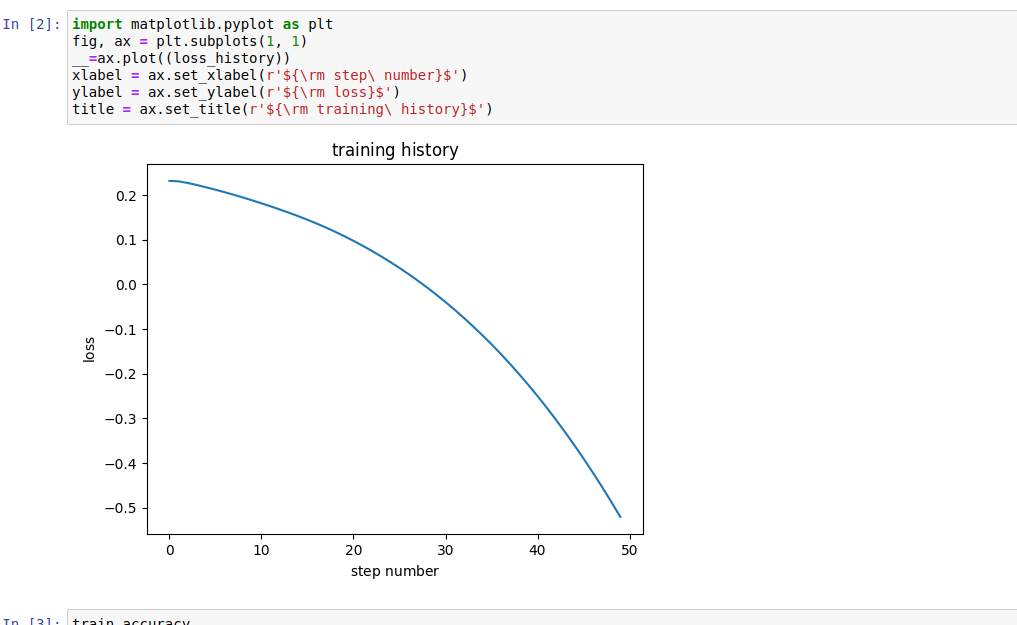
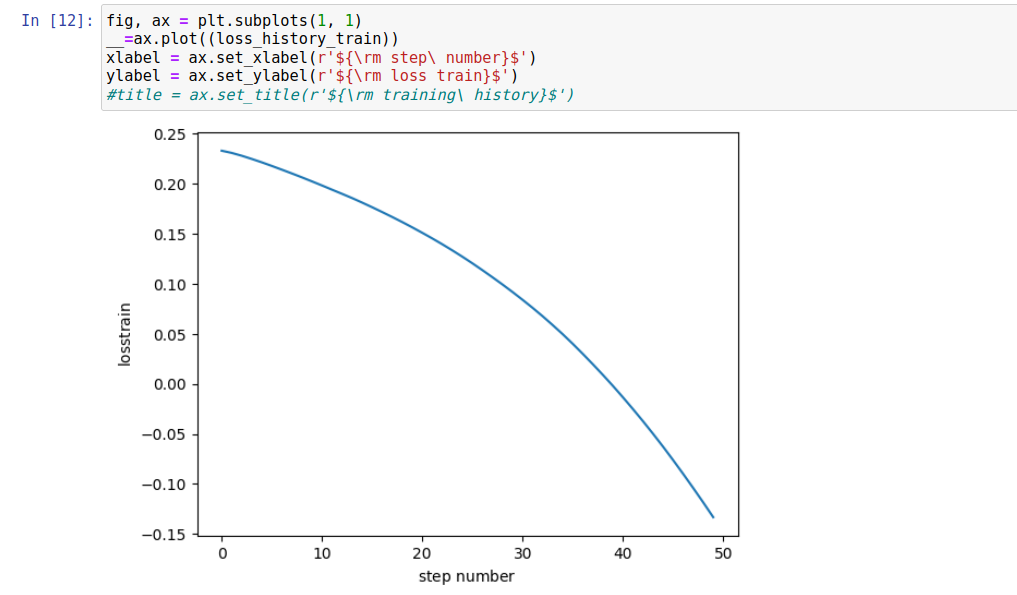
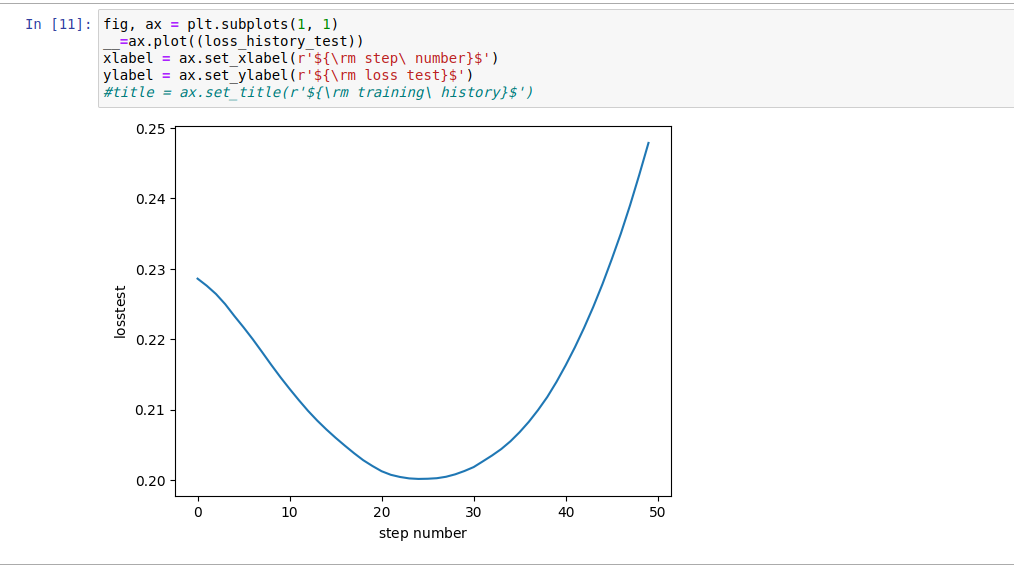
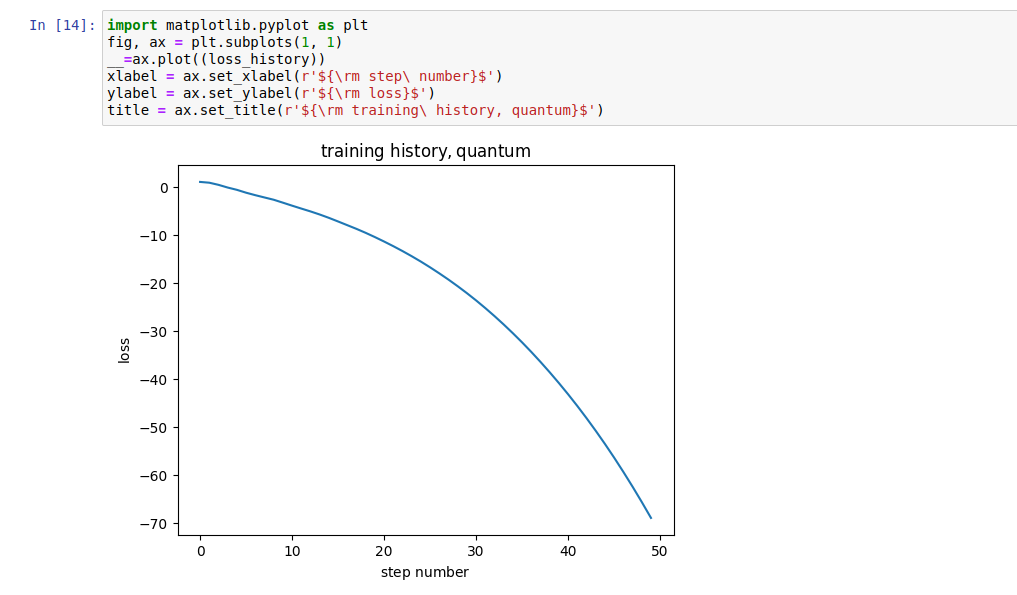
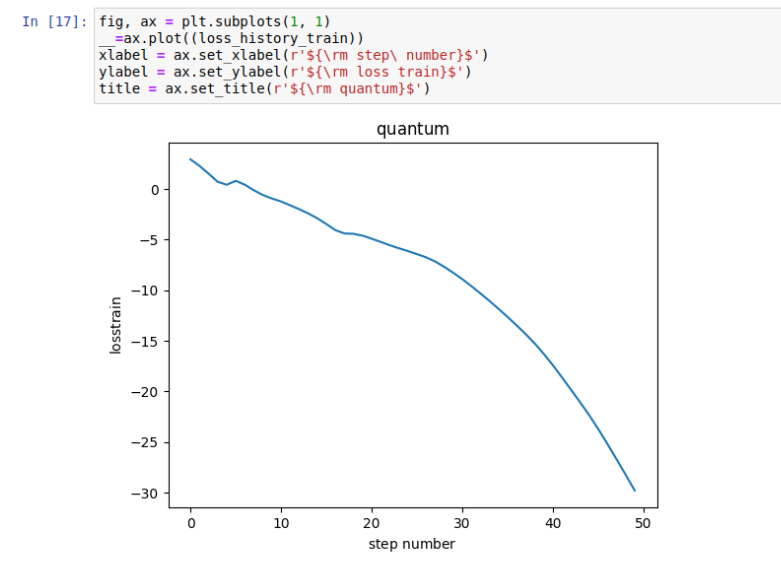
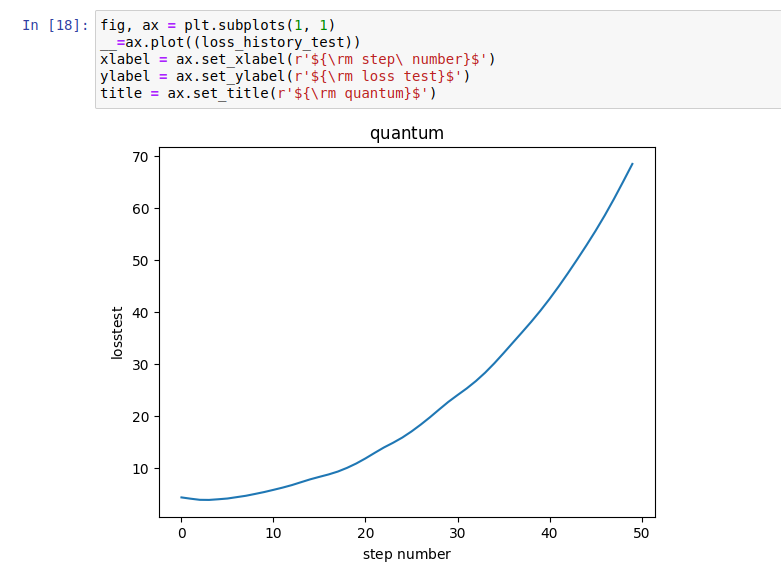

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_train))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss train}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_test))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss test}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
theta = jnp.asarray(90*np.random.random((3,6)), dtype = int)
theta1 = np.random.randint(90, size=(1, 6))
print(theta, theta1)